<h1>1. Business Understanding</h1>

<h2>Objective:</h2>

The primary goal is to predict whether a borrower will default on their loan. This will help financial institutions in Kenya make better lending decisions and reduce the risk of bad loans.

<h2>Key Questions:</h2>

What factors contribute to loan defaults?

Can we predict which borrowers are likely to default based on their profile and loan details?

How can the model be used to improve loan approval processes?

<h1>2. Data Understanding</h1>

<h2>Dataset Overview:</h2>

The dataset contains information about borrowers, including their demographics, employment status, credit score, loan details, and whether they defaulted on their loan.

<h2>Key Variables:</h2>
ID: Unique identifier for each borrower.

GENDER: Gender of the borrower.

AGE: Age of the borrower.

NO_DEFAULT_LOAN: Number of previous loans without default.

EMPLOYMENT_STATUS: Employment status of the borrower.

: Sector in which the borrower works.

MARITAL_STATUS: Marital status of the borrower.

CREDIT_SCORE: Credit score of the borrower.

SCOREGRADE: Credit score grade.

CRR: Credit risk rating.

CURRENCY: Currency of the loan (KES in this case).

NET INCOME: Net income of the borrower.

PRINCIPAL_AMOUNT: Loan amount.

EMI: Equated Monthly Installment (monthly payment).

OD_DAYS: Number of days the loan is overdue.

PRUDENTIAL_CLASSIFICATION: Classification of the loan (e.g., Normal, Doubtful).

RISK_GRADE: Risk grade of the borrower.

AREARS: Amount in arrears.

LOAN_STATUS: Current status of the loan (e.g., Current, Expired).


<h2>Data Exploration:</h2>

Missing Values: Some columns like GENDER, AGE, CREDIT_SCORE, and SCOREGRADE have missing values.

Data Types: Most columns are numerical, but some like GENDER, EMPLOYMENT_STATUS, and LOAN_STATUS are categorical.

Target Variable: LOAN_STATUS will be our target variable. We will classify loans as "Default" (Expired) or "Non-Default" (Current).

<h1>3. Data Preparation</h1> 

<h2>Data Cleaning:</h2>

<h3>Handling Missing Values:</h3>

For numerical columns like AGE we can fill missing values with the median or mean.

Removing Irrelevant Columns: Columns like CURRENCY (since all loans are in KES) can be dropped.

Encoding Categorical Variables: Convert categorical variables like GENDER, EMPLOYMENT_STATUS, and LOAN_STATUS into numerical values using one-hot encoding or label encoding.

<h2>Feature Engineering:</h2>

Loan-to-Income Ratio: Create a new feature by dividing the PRINCIPAL_AMOUNT by NET INCOME. This can help assess the borrower's ability to repay the loan.

Debt-to-Income Ratio: Calculate the ratio of EMI to NET INCOME.

Overdue Ratio: Calculate the ratio of OD_DAYS to the loan tenure.

*** Data Splitting:
Split the data into training (80%) and testing (20%) sets to evaluate the model's performance.

<h1>4. Modeling</h1>

<h2>Model Selection:</h2>
We will use classification algorithms to predict whether a borrower will default. Some common algorithms include:

Logistic Regression

Decision Trees

Random Forest

Gradient Boosting (e.g., XGBoost, LightGBM)

Support Vector Machines (SVM)

*** Model Training:
Train each model on the training dataset.

Use cross-validation to ensure the model generalizes well to unseen data.

*** Hyperparameter Tuning:

Use techniques like Grid Search or Random Search to find the best hyperparameters for each model.

* 5. Evaluation

Model Evaluation Metrics:

Accuracy: Percentage of correctly predicted defaults and non-defaults.

Precision: Percentage of predicted defaults that are actual defaults.

Recall: Percentage of actual defaults that are correctly predicted.

F1-Score: Balance between precision and recall.

ROC-AUC: Area under the ROC curve, which measures the model's ability to distinguish between default and non-default classes.

*** Model Comparison:

Compare the performance of different models based on the above metrics.

Select the best-performing model for deployment.

Confusion Matrix:

Visualize the number of true positives, true negatives, false positives, and false negatives.

* 6. Deployment

Model Deployment:

Deploy the best model as a web service or API that financial institutions can use to predict loan defaults in real-time.

Use tools like Flask or FastAPI to create the API.

Monitoring:

Continuously monitor the model's performance in production.

Retrain the model periodically with new data to ensure it remains accurate.

User Interface:
Create a simple dashboard where loan officers can input borrower details and get a prediction on whether the borrower is likely to default.

* Conclusion
By following the CRISP-DM framework, we have built a Loan Default Detection System that can help financial institutions in Kenya make better lending decisions. The model predicts whether a borrower is likely to default based on their profile and loan details, reducing the risk of bad loans and improving the overall health of the financial sector.





In [2]:
#Import libraries
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [12]:
df = pd.read_csv(r'C:\Users\ADMIN\Documents\project MR\DSC-CapstoneProject\Data\Final_dataset_Final.csv')
df

,ID,GENDER,AGE,MARITAL_STATUS,EMPLOYMENT_STATUS,CREDIT_SCORE,SCORE_GRADE,NO_DEFAULT_LOAN,RISK_GRADE,PRODUCT,CURRENCY,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,OD_AMOUNT,LOAN_STATUS
0,104465,MALE,NaN,NaN,NaN,480.0,JJ,1.0,B20,Premium Finance - Consumer,KES,0.00,"235,203.00","40,637.03",2995,LOSS,"45,011.10",EXPIRED
1,138046,MALE,55.0,NaN,NaN,537.0,JJ,2.0,B20,Consumer Unsecured Loan,KES,0.00,"215,000.00","7,186.79",2582,LOSS,"115,674.06",EXPIRED
2,173501,MALE,NaN,NaN,NaN,545.0,JJ,1.0,B20,Consumer Unsecured Loan,KES,0.00,"155,000.00","4,258.42",2667,LOSS,"65,541.89",EXPIRED
3,141836,MALE,NaN,NaN,NaN,626.0,HH,3.0,B20,Consumer Unsecured Loan,KES,0.00,"335,000.00","7,158.92",2810,LOSS,"297,407.57",EXPIRED
4,65973,MALE,63.0,MARRIED,EMPLOYED,524.0,JJ,2.0,B20,Consumer Unsecured Loan,KES,0.00,"105,000.00","2,136.29",2879,LOSS,"117,969.24",EXPIRED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115888,154303,MALE,38.0,MARRIED,SELF-EMPLOYED,624.0,HH,4.0,A5,Digital Personal Loan,KES,3090724.25,"100,000.00","34,398.05",0,NORMAL,0,CURRENT
115889,61445,MALE,43.0,MARRIED,EMPLOYED,579.0,JJ,1.0,A5,Mobile Loan,KES,819280.00,"20,746.00","21,088.53",0,NORMAL,0,CURRENT
115890,151235,MALE,27.0,SINGLE,EMPLOYED,636.0,HH,0.0,A5,Mobile Loan,KES,529145.61,"12,700.00","12,909.69",0,NORMAL,0,CURRENT
115891,181809,FEMALE,42.0,NaN,OTHER,667.0,FF,0.0,A5,Mobile Loan,KES,4129210.00,"13,000.00","13,214.64",0,NORMAL,0,CURRENT


In [14]:
# Check the number of rows to confirm
print("Total rows before cleaning:", df.shape[0])

Total rows before cleaning: 115893


In [15]:
# checks for missing (NaN) values
df.isna().sum()

ID                               0
GENDER                       15776
AGE                          17456
MARITAL_STATUS               45468
EMPLOYMENT_STATUS            31760
CREDIT_SCORE                 21012
SCORE_GRADE                  21322
NO_DEFAULT_LOAN              21322
RISK_GRADE                       0
PRODUCT                          1
CURRENCY                         0
NET INCOME                       0
PRINCIPAL_DISBURSED              0
EMI                              0
OD_DAYS                          0
PRUDENTIAL_CLASSIFICATION        0
OD_AMOUNT                        0
LOAN_STATUS                      0
dtype: int64

In [16]:
# Show the data types of all columns
df.dtypes


ID                             int64
GENDER                        object
AGE                          float64
MARITAL_STATUS                object
EMPLOYMENT_STATUS             object
CREDIT_SCORE                 float64
SCORE_GRADE                   object
NO_DEFAULT_LOAN              float64
RISK_GRADE                    object
PRODUCT                       object
CURRENCY                      object
NET INCOME                   float64
PRINCIPAL_DISBURSED           object
EMI                           object
OD_DAYS                        int64
PRUDENTIAL_CLASSIFICATION     object
OD_AMOUNT                     object
LOAN_STATUS                   object
dtype: object

In [17]:
#Check the "EMI", "OD_AMOUNT", "PRINCIPAL_DISBURSED" to understand why they are termed as object data types
df.loc[:, ["EMI", "OD_AMOUNT", "PRINCIPAL_DISBURSED"]]

,EMI,OD_AMOUNT,PRINCIPAL_DISBURSED
0,"40,637.03","45,011.10","235,203.00"
1,"7,186.79","115,674.06","215,000.00"
2,"4,258.42","65,541.89","155,000.00"
3,"7,158.92","297,407.57","335,000.00"
4,"2,136.29","117,969.24","105,000.00"
...,...,...,...
115888,"34,398.05",0,"100,000.00"
115889,"21,088.53",0,"20,746.00"
115890,"12,909.69",0,"12,700.00"
115891,"13,214.64",0,"13,000.00"


In [20]:
#Remove commas and change the data types to float of the mentioned columns
df["EMI"] = df["EMI"].astype(str).str.replace(",", "").astype(float)
df["OD_AMOUNT"] = df["OD_AMOUNT"].astype(str).str.replace(",", "").astype(float)
df["PRINCIPAL_DISBURSED"] = df["PRINCIPAL_DISBURSED"].astype(str).str.replace(",", "").astype(float)

#Display the changed columns
df.loc[:, ["EMI", "OD_AMOUNT", "PRINCIPAL_DISBURSED"]]


,EMI,OD_AMOUNT,PRINCIPAL_DISBURSED
0,40637.03,45011.10,235203.0
1,7186.79,115674.06,215000.0
2,4258.42,65541.89,155000.0
3,7158.92,297407.57,335000.0
4,2136.29,117969.24,105000.0
...,...,...,...
115888,34398.05,0.00,100000.0
115889,21088.53,0.00,20746.0
115890,12909.69,0.00,12700.0
115891,13214.64,0.00,13000.0


In [26]:
df.dropna(subset=["CREDIT_SCORE", "SCORE_GRADE", "GENDER","AGE","EMPLOYMENT_STATUS"], inplace=True)
df.isna().sum()


ID                               0
GENDER                           0
AGE                              0
MARITAL_STATUS               14180
EMPLOYMENT_STATUS                0
CREDIT_SCORE                     0
SCORE_GRADE                      0
NO_DEFAULT_LOAN                  0
RISK_GRADE                       0
PRODUCT                          0
CURRENCY                         0
NET INCOME                       0
PRINCIPAL_DISBURSED              0
EMI                              0
OD_DAYS                          0
PRUDENTIAL_CLASSIFICATION        0
OD_AMOUNT                        0
LOAN_STATUS                      0
dtype: int64

Since the only column that has null values is the Marital_Status column. we decided to investaigate its values 

In [36]:
df["MARITAL_STATUS"].unique()
df["MARITAL_STATUS"].value_counts()



MARRIED     40826
SINGLE      22467
OTHER        1408
WIDOWED       163
DIVORCED       99
ENGAGED        99
PARTNER        29
Name: MARITAL_STATUS, dtype: int64

In [38]:
df["MARITAL_STATUS"] = df["MARITAL_STATUS"].fillna("OTHER")
df.isna().sum()

ID                           0
GENDER                       0
AGE                          0
MARITAL_STATUS               0
EMPLOYMENT_STATUS            0
CREDIT_SCORE                 0
SCORE_GRADE                  0
NO_DEFAULT_LOAN              0
RISK_GRADE                   0
PRODUCT                      0
CURRENCY                     0
NET INCOME                   0
PRINCIPAL_DISBURSED          0
EMI                          0
OD_DAYS                      0
PRUDENTIAL_CLASSIFICATION    0
OD_AMOUNT                    0
LOAN_STATUS                  0
dtype: int64

In replacing all the nan values in Marital_Status with other, we were able to have zero null values

In [39]:
df["MARITAL_STATUS"].value_counts()

MARRIED     40826
SINGLE      22467
OTHER       15588
WIDOWED       163
DIVORCED       99
ENGAGED        99
PARTNER        29
Name: MARITAL_STATUS, dtype: int64

In [42]:
#Check for current shape of the data set
df.shape

(79271, 18)

In [43]:
df["PRUDENTIAL_CLASSIFICATION"].value_counts()

NORMAL         60963
LOSS            9700
DOUBTFUL        3308
WATCH           3042
SUBSTANDARD     2258
Name: PRUDENTIAL_CLASSIFICATION, dtype: int64

In [44]:
# Define default vs. non-default conditions
df['DEFAULT_STATUS'] = np.where(df['PRUDENTIAL_CLASSIFICATION'].isin(['SUBSTANDARD', 'DOUBTFUL', 'LOSS']), 'DEFAULT', 'NON-DEFAULT')

In [45]:
df['DEFAULT_STATUS'].value_counts()

NON-DEFAULT    64005
DEFAULT        15266
Name: DEFAULT_STATUS, dtype: int64

In [48]:
#Load clean data set
df_cleaned = pd.read_csv(r'C:\Users\ADMIN\Documents\project MR\DSC-CapstoneProject\Data\Cleaned_dataset.csv')
df_cleaned

,ID,GENDER,AGE,MARITAL_STATUS,EMPLOYMENT_STATUS,CREDIT_SCORE,SCORE_GRADE,NO_DEFAULT_LOAN,RISK_GRADE,PRODUCT,CURRENCY,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,OD_AMOUNT,LOAN_STATUS,DEFAULT_STATUS
0,65973,MALE,63.0,MARRIED,EMPLOYED,524.0,JJ,2.0,B20,Consumer Unsecured Loan,KES,0.00,105000.00,2136.29,2879,LOSS,117969.24,EXPIRED,DEFAULT
1,123979,FEMALE,43.0,MARRIED,OTHER,713.0,CC,0.0,A5,Mortgage Loan,KES,6082350.54,5189721.55,40346.25,0,NORMAL,0.00,CURRENT,NON-DEFAULT
2,179032,MALE,45.0,MARRIED,EMPLOYED,610.0,II,1.0,B20,Consumer Unsecured Loan,KES,0.00,680000.00,14996.64,3763,LOSS,857627.23,EXPIRED,DEFAULT
3,75503,MALE,50.0,MARRIED,SELF-EMPLOYED,625.0,HH,1.0,A5,Motor Vehicle Loan,KES,1916500.00,2489731.41,61804.69,0,NORMAL,0.00,CURRENT,NON-DEFAULT
4,76448,MALE,35.0,MARRIED,EMPLOYED,657.0,GG,3.0,B11,Motor Vehicle Loan,KES,0.00,4772722.00,115661.85,754,LOSS,3725529.80,EXPIRED,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79266,154303,MALE,38.0,MARRIED,SELF-EMPLOYED,624.0,HH,4.0,A5,Digital Personal Loan,KES,3090724.25,100000.00,34398.05,0,NORMAL,0.00,CURRENT,NON-DEFAULT
79267,61445,MALE,43.0,MARRIED,EMPLOYED,579.0,JJ,1.0,A5,Mobile Loan,KES,819280.00,20746.00,21088.53,0,NORMAL,0.00,CURRENT,NON-DEFAULT
79268,151235,MALE,27.0,SINGLE,EMPLOYED,636.0,HH,0.0,A5,Mobile Loan,KES,529145.61,12700.00,12909.69,0,NORMAL,0.00,CURRENT,NON-DEFAULT
79269,181809,FEMALE,42.0,OTHER,OTHER,667.0,FF,0.0,A5,Mobile Loan,KES,4129210.00,13000.00,13214.64,0,NORMAL,0.00,CURRENT,NON-DEFAULT


In [50]:
df_cleaned.duplicated().value_counts()

False    79271
dtype: int64

<h1>EXPLOTARY DATA ANALYSIS</h1>

In [51]:
# Display basic information about the dataset
df_cleaned.info()

# Check for missing values again
missing_values = df_cleaned.isna().sum()

# Display first few rows
df_cleaned.head(), missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79271 entries, 0 to 79270
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         79271 non-null  int64  
 1   GENDER                     79271 non-null  object 
 2   AGE                        79271 non-null  float64
 3   MARITAL_STATUS             79271 non-null  object 
 4   EMPLOYMENT_STATUS          79271 non-null  object 
 5   CREDIT_SCORE               79271 non-null  float64
 6   SCORE_GRADE                79271 non-null  object 
 7   NO_DEFAULT_LOAN            79271 non-null  float64
 8   RISK_GRADE                 79271 non-null  object 
 9   PRODUCT                    79271 non-null  object 
 10  CURRENCY                   79271 non-null  object 
 11  NET INCOME                 79271 non-null  float64
 12  PRINCIPAL_DISBURSED        79271 non-null  float64
 13  EMI                        79271 non-null  flo

(       ID  GENDER   AGE MARITAL_STATUS EMPLOYMENT_STATUS  CREDIT_SCORE  \
 0   65973    MALE  63.0        MARRIED          EMPLOYED         524.0   
 1  123979  FEMALE  43.0        MARRIED             OTHER         713.0   
 2  179032    MALE  45.0        MARRIED          EMPLOYED         610.0   
 3   75503    MALE  50.0        MARRIED     SELF-EMPLOYED         625.0   
 4   76448    MALE  35.0        MARRIED          EMPLOYED         657.0   
 
   SCORE_GRADE  NO_DEFAULT_LOAN RISK_GRADE                  PRODUCT CURRENCY  \
 0          JJ              2.0        B20  Consumer Unsecured Loan      KES   
 1          CC              0.0         A5            Mortgage Loan      KES   
 2          II              1.0        B20  Consumer Unsecured Loan      KES   
 3          HH              1.0         A5       Motor Vehicle Loan      KES   
 4          GG              3.0        B11       Motor Vehicle Loan      KES   
 
    NET INCOME  PRINCIPAL_DISBURSED        EMI  OD_DAYS  \
 0     

Observations from Data Overview:
The dataset has 79,271 rows and 19 columns.

No missing values remain after cleaning.

Data types are appropriate, with numerical values correctly assigned as float64 or int64, and categorical variables as object.

The target variable is DEFAULT_STATUS, categorized as DEFAULT or NON-DEFAULT.

The currency column (CURRENCY) has only "KES", so we can drop it.

Next, we perform exploratory data analysis (EDA) to understand patterns and trends

In [ ]:
# Drop unnecessary column (CURRENCY) since it has only one value "KES"
df_cleaned.drop(columns=["CURRENCY"], inplace=True)


In [54]:
# Summary statistics of numerical variables
summary_stats = df_cleaned.describe()
summary_stats,


(                  ID           AGE  CREDIT_SCORE  NO_DEFAULT_LOAN  \
 count   79271.000000  79271.000000  79271.000000     79271.000000   
 mean   125088.613402     38.589396    648.149210         1.395807   
 std     43354.023731     14.017264     80.520443         1.951161   
 min     50001.000000  -1799.000000      0.000000         0.000000   
 25%     87583.500000     32.000000    595.000000         0.000000   
 50%    125039.000000     37.000000    645.000000         1.000000   
 75%    162686.000000     44.000000    706.000000         2.000000   
 max    199999.000000     94.000000    830.000000        84.000000   
 
          NET INCOME  PRINCIPAL_DISBURSED           EMI       OD_DAYS  \
 count  7.927100e+04         7.927100e+04  7.927100e+04  79271.000000   
 mean   1.626253e+06         7.369712e+05  3.349274e+04    179.934137   
 std    4.676518e+06         1.901389e+06  1.555300e+05    530.773909   
 min    0.000000e+00         0.000000e+00  0.000000e+00      0.000000   
 25

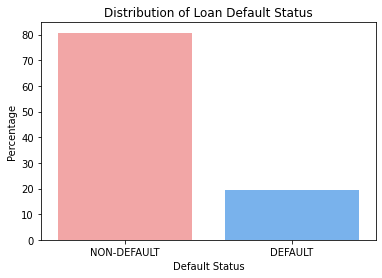

NON-DEFAULT    80.742012
DEFAULT        19.257988
Name: DEFAULT_STATUS, dtype: float64

In [55]:

# Distribution of target variable
target_distribution = df_cleaned["DEFAULT_STATUS"].value_counts(normalize=True) * 100

# Visualizing the distribution of target variable
plt.figure(figsize=(6, 4))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette=["#FF9999", "#66B2FF"])
plt.title("Distribution of Loan Default Status")
plt.xlabel("Default Status")
plt.ylabel("Percentage")
plt.show()

target_distribution


Key EDA Insights:
Target Variable Distribution:

80.74% of loans are non-default.

19.26% of loans are default.

There is an imbalance, which should be addressed during modeling (e.g., using SMOTE or class-weight adjustments).

Age Anomalies:

The minimum age is -1799, which is clearly an error.

I will replace negative and extreme ages with a more realistic value.

Financial Features:

Net Income, Principal Disbursed, and EMI show a wide range, with some extreme values.

Outliers may need log transformation or scaling.

Next, I'll clean the age column and check correlations between key numerical variables.

In [65]:
# Fix unrealistic AGE values by setting negative ages to the median age
median_age = df_cleaned[df_cleaned["AGE"] > 0]["AGE"].median()
df_cleaned.loc[df_cleaned["AGE"] < 0, "AGE"] = median_age

In [66]:
# Display updated age statistics
df_cleaned["AGE"].describe()

count    79271.000000
mean        38.653732
std          9.303334
min          2.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         94.000000
Name: AGE, dtype: float64

Updated Observations:
Age Correction:

The unrealistic negative values were replaced with the median (37 years).

The minimum age is now 2, which still seems low. I can filter out extreme values (e.g., below 18).

Distribution of Numerical Features

Relationship Between Features and Default Status

Categorical Feature Analysis

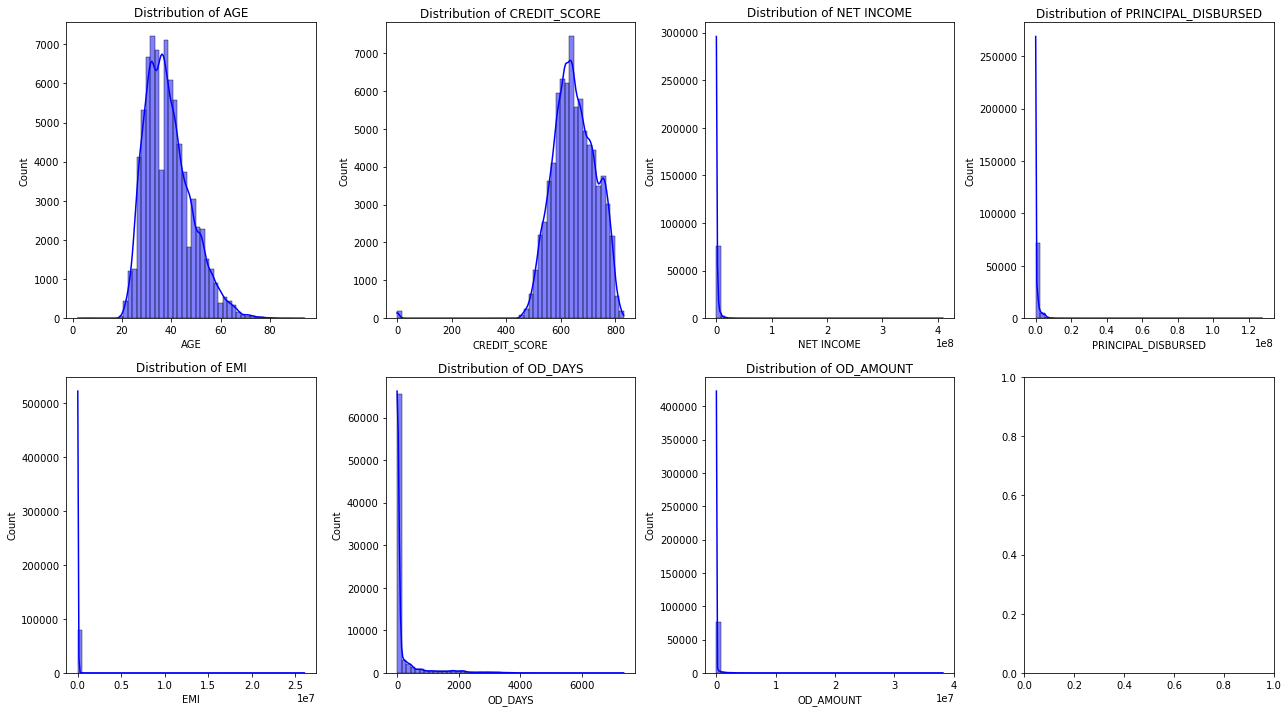

In [67]:
# Update numerical columns list (removing 'AREARS' and ensuring correct names)
numerical_cols = ["AGE", "CREDIT_SCORE", "NET INCOME", "PRINCIPAL_DISBURSED", "EMI", "OD_DAYS", "OD_AMOUNT"]

# Create histograms for numerical features
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df_cleaned[col], bins=50, kde=True, ax=axes[i], color="blue")
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()




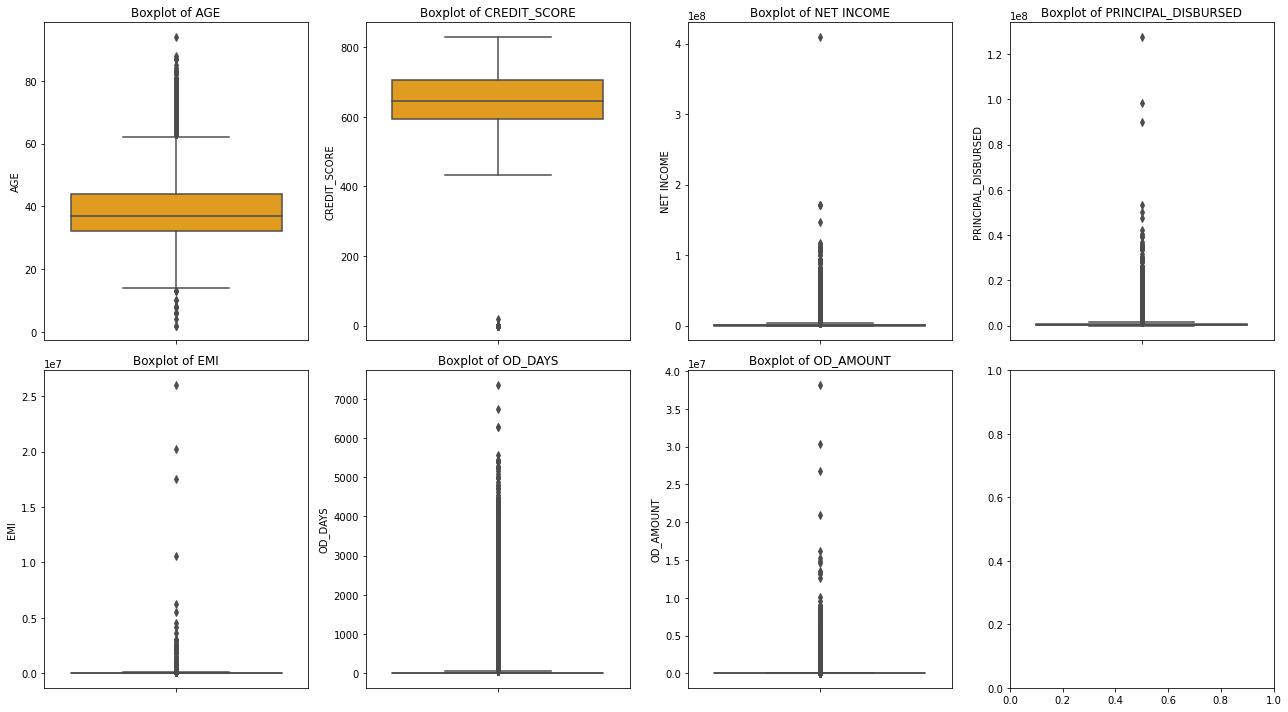

In [68]:
# Box plots to identify outliers
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df_cleaned[col], ax=axes[i], color="orange")
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

Insights from Numerical Feature Distributions:
Skewed Distributions:

Features like "NET INCOME," "PRINCIPAL_DISBURSED," and "OD_AMOUNT" have highly skewed distributions, indicating the presence of extreme values (outliers).

Log transformation (already applied) helps mitigate this.

Outliers Detected:

Box plots reveal significant outliers in "EMI," "OD_DAYS," "NET INCOME," and "PRINCIPAL_DISBURSED."

This suggests some borrowers have very high overdue days or loan amounts.

